## Оглавление:
* [1. Получить ведомость оплаты: id - сумма](#1-bullet)


* [2. Найти id, которые заработали больше других и в сумме заработали 60% денег](#2-bullet)
   
   
* [3. Предложить свой метод поиска тех, кто заработал слишком много, с целью обнаружить неточность / подлог в исходных данных](#3-bullet)

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
import numpy as np

In [2]:
# предустановка общих параметров графиков
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# загрузка данных
jobs = pd.read_csv('/home/bold/Загрузки/test_pandas.csv')

In [4]:
# изучение данных на предмет пропусков
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79524 entries, 0 to 79523
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            79524 non-null  int64  
 1   price_per_job  79524 non-null  float64
 2   jobs_made      79524 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


In [5]:
jobs.head()

,uid,price_per_job,jobs_made
0,3,0.03,1
1,3,0.10,2
2,3,0.10,2
3,3,0.15,1
4,3,1.00,4


# 1. Получить ведомость оплаты: id - сумма<a class="anchor" id="1-bullet"></a>

In [6]:
# расчёт заработка
jobs['salary'] = jobs['price_per_job']*jobs['jobs_made']
jobs.head()

,uid,price_per_job,jobs_made,salary
0,3,0.03,1,0.03
1,3,0.10,2,0.20
2,3,0.10,2,0.20
3,3,0.15,1,0.15
4,3,1.00,4,4.00


In [7]:
# группировка данных
stat = jobs.groupby('uid')['salary'].sum().to_frame()
stat.head()

,salary
uid,
3,8.88
5,100.10
35,31553.60
67,40.70
68,170.35


# 2. Найти id, которые заработали больше других и в сумме заработали 60% денег<a class="anchor" id="2-bullet"></a>

In [8]:
# сортировка данных по сумме заработка
best_w = stat.sort_values(by='salary', ascending=False)

# добавление столбца с кумулятивным заработком
best_w['salary_cum'] = best_w['salary'].cumsum()

# добавление столбца с кумулятивной долей заработка
best_w['salary_cum_%'] = best_w['salary_cum'] / best_w['salary'].sum()

# получение среза данных с uid, в сумме заработавшими 60% денег
best_w[best_w['salary_cum_%'] <= 0.60]

best_w.head()

,salary,salary_cum,salary_cum_%
uid,,,
196,47352.45,47352.45,0.025623
6239,44430.40,91782.85,0.049665
6236,43515.20,135298.05,0.073212
2901,41027.75,176325.80,0.095413
112445,32218.40,208544.20,0.112847


In [9]:
# формирование списка uid в соответствии с буквой задания
np.array(best_w.index)

array([   196,   6239,   6236, ..., 263239, 265616, 265716])

# 3. Предложить свой метод поиска тех, кто заработал слишком много, с целью обнаружить неточность / подлог в исходных данных<a class="anchor" id="3-bullet"></a>

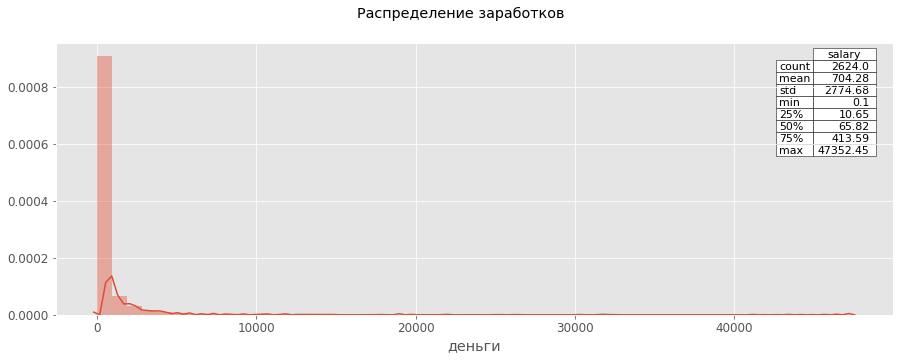

In [10]:
# построение графика для определения распределения данных
fig1, ax1 = plt.subplots()
table(ax1, np.round(stat['salary'].describe(), 2),
      loc='upper right',
      colWidths=[0.075])
sns.distplot(stat['salary'])
ax1.set_xlabel('деньги')
fig1.suptitle("Распределение заработков")
plt.show()

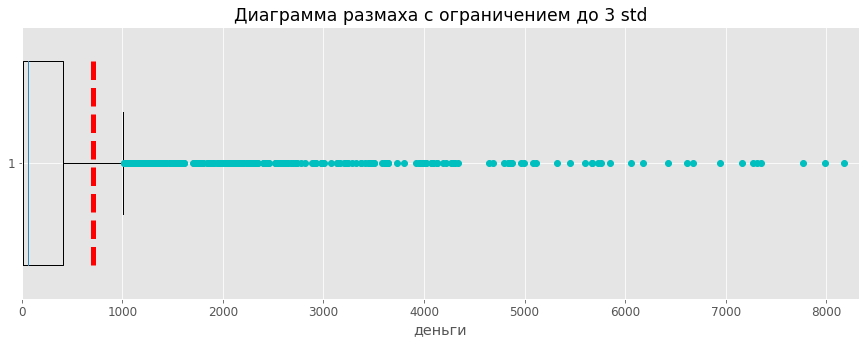

In [11]:
# приближение основных значений распределения, т.к.
# значительная положительная скошенность мешает адекватной визуализации.
# В качестве верхней границы графика определено значение 3 станд. отклонений.
plt.boxplot(stat['salary'], 0, 'c', 0, widths = 0.75, meanline=True, showmeans=True, \
            meanprops = dict(linestyle='--', linewidth=5, color='red'))
plt.xlim(0,stat['salary'].std()*3)
plt.title('Диаграмма размаха с ограничением до 3 std')
plt.xlabel('деньги')
plt.show()

Предлагается определение аларм-заработков как статистических выбросов, превышающих два стандартных отклонения. Правильность данного способа подтверждается визуально на диаграмме размаха, где после значения "5000" наступает разреженная область значений.

In [12]:
anom = stat['salary'].std()*2
cnt_anom = stat[stat['salary'] >= anom].count()
perc_anom = cnt_anom/len(stat)
print('К проверке предлагаются суммы заработка превышающие {:.0f} денег.'.format(anom))
print('Количество значений к проверке {} или {:.0%}.'.format(int(cnt_anom), float(perc_anom)))

К проверке предлагаются суммы заработка превышающие 5549 денег.
Количество значений к проверке 58 или 2%.
